# Regresión logistica para predicciones bancarias

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("datasets/bank/bank.csv", sep=";")

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [10]:
data.shape

(4119, 21)

In [11]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [12]:
data['y'] = (data["y"]=="yes").astype(int)

In [13]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [14]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])
data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [15]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [16]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [17]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [18]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [19]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra')

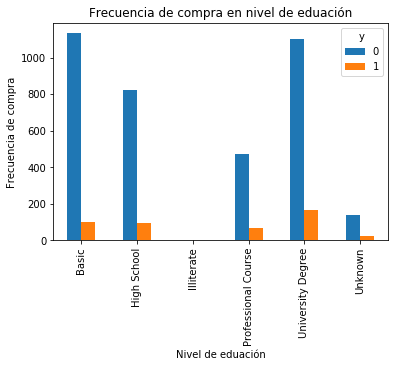

In [20]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en nivel de eduación")
plt.xlabel("Nivel de eduación")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Proporción de clientes')

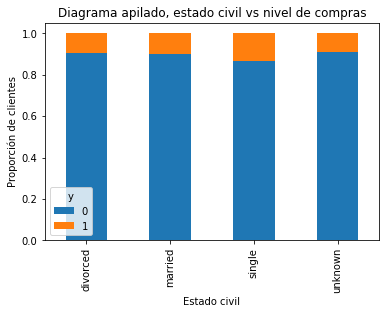

In [21]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado, estado civil vs nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra')

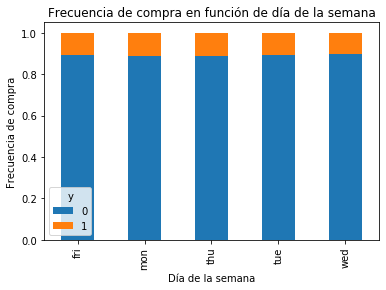

In [22]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función de día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Frecuencia de compra')

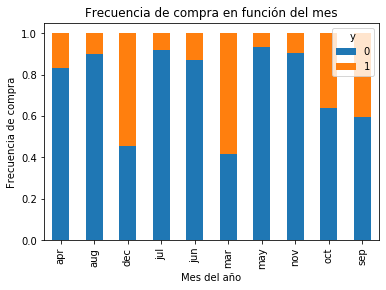

In [23]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Frecuencia de compra')

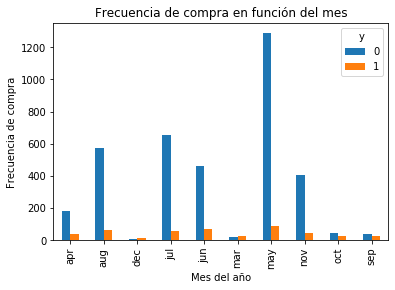

In [24]:
table.plot(kind="bar")
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Frecuencia de compra')

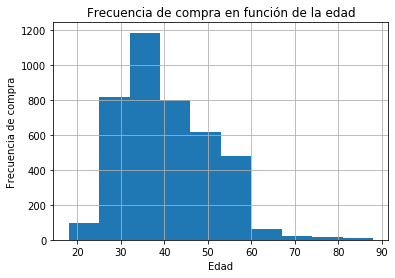

In [25]:
data.age.hist()
plt.title("Frecuencia de compra en función de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia de compra")

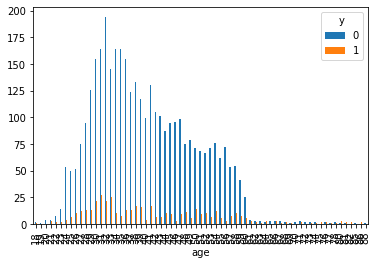

In [26]:
pd.crosstab(data.age, data.y).plot(kind="bar")

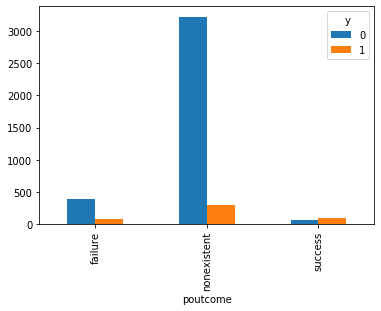

In [27]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

## Seleccion de variables categoricas
### Conversión de variables categoricas a dummies

In [28]:
categories = ["job", "marital", "education", "housing", "loan", "contact",
              "month", "day_of_week", "poutcome"]
for category in categories: 
    cat_list = "cat_" + category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    print(cat_dummies)
    data_new = data.join(cat_dummies)
    data = data_new

      job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0              0                1                 0              0   
1              0                0                 0              0   
2              0                0                 0              0   
3              0                0                 0              0   
4              1                0                 0              0   
...          ...              ...               ...            ...   
4114           1                0                 0              0   
4115           1                0                 0              0   
4116           0                0                 0              0   
4117           1                0                 0              0   
4118           0                0                 0              0   

      job_management  job_retired  job_self-employed  job_services  \
0                  0            0                  0             0   
1                  

In [29]:
data_vars=data.columns.values.tolist()

In [30]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [36]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [37]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ["y"]
X = [v for v in bank_data_vars if v not in Y]

## Selección de rasgos para el modelo

In [40]:
n=12
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression(solver='lbfgs', max_iter=5000)
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [45]:
#bank_data["job_blue-collar"] = bank_data["job_blue-collar"].fillna(bank_data["job_blue-collar"].mean())

In [46]:
print(rfe.support_)

[False False False False False  True  True False False False False False
 False False False  True False False False False  True False False False
 False False False False False False False False False False False False
 False False False  True  True False  True False False  True  True  True
 False False False False False False False  True False  True]


In [47]:
print(rfe.ranking_)

[35 45 23 47  5  1  1 29 42 43  3 12 10 38 11  1  6 14 34  2  1 17 32 19
 20 46 40 39 26 24 25  8 37  7 15 21 13 41  4  1  1 28  1 16 30  1  1  1
 22 27 36 31 44 33  9  1 18  1]


In [48]:
z = zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [49]:
list(z)

[('age', False, 35),
 ('duration', False, 45),
 ('campaign', False, 23),
 ('pdays', False, 47),
 ('previous', False, 5),
 ('emp.var.rate', True, 1),
 ('cons.price.idx', True, 1),
 ('cons.conf.idx', False, 29),
 ('euribor3m', False, 42),
 ('nr.employed', False, 43),
 ('y', False, 3),
 ('job_admin.', False, 12),
 ('job_blue-collar', False, 10),
 ('job_entrepreneur', False, 38),
 ('job_housemaid', False, 11),
 ('job_management', True, 1),
 ('job_retired', False, 6),
 ('job_self-employed', False, 14),
 ('job_services', False, 34),
 ('job_student', False, 2),
 ('job_technician', True, 1),
 ('job_unemployed', False, 17),
 ('job_unknown', False, 32),
 ('marital_divorced', False, 19),
 ('marital_married', False, 20),
 ('marital_single', False, 46),
 ('marital_unknown', False, 40),
 ('education_Basic', False, 39),
 ('education_High School', False, 26),
 ('education_Illiterate', False, 24),
 ('education_Professional Course', False, 25),
 ('education_University Degree', False, 8),
 ('education_Un

In [50]:
j=0
for i in bank_data_vars:
    if(j<len(rfe.ranking_)): 
        if rfe.ranking_[j]==1:
            print(i,rfe.support_[j], rfe.ranking_[j])
        j=j+1

emp.var.rate True 1
cons.price.idx True 1
job_management True 1
job_technician True 1
contact_cellular True 1
contact_telephone True 1
month_aug True 1
month_jun True 1
month_mar True 1
month_may True 1
day_of_week_wed True 1
poutcome_nonexistent True 1


In [51]:
cols=["day_of_week_wed", "poutcome_nonexistent", "month_jun", "month_mar", "month_may", "emp.var.rate",
      "cons.price.idx", "job_management", "job_technician","contact_cellular", "contact_telephone"]

In [52]:
X = bank_data[cols]
Y = bank_data["y"]

## Implementación del modelo en Python con statsmodel.api

In [55]:
import statsmodels.api as sm

In [56]:
logit_model = sm.Logit(Y,X)

In [57]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.282781
         Iterations 7


In [58]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                  Logit              Pseudo R-squared:   0.181      
Dependent Variable:     y                  AIC:                2351.5519  
Date:                   2021-06-30 15:03   BIC:                2421.1089  
No. Observations:       4119               Log-Likelihood:     -1164.8    
Df Model:               10                 LL-Null:            -1422.9    
Df Residuals:           4108               LLR p-value:        1.4547e-104
Converged:              1.0000             Scale:              1.0000     
No. Iterations:         7.0000                                            
--------------------------------------------------------------------------
                       Coef.   Std.Err.    z     P>|z|    [0.025   0.975] 
--------------------------------------------------------------------------
day_of_week_wed         0.1236   0.1406   0.8794 0.3792   -0.1519   0.3992
poutcome_nonexistent   -0.1974   0.1362  -1.4495 0.1472   -0.4644   0.0695
month_jun               0.0566   0.1819   0.3111 0.7558   -0.2999   0.4131
month_mar               1.5450   0.3092   4.9972 0.0000    0.9390   2.1509
month_may              -0.6532   0.1384  -4.7203 0.0000   -0.9244  -0.3820
emp.var.rate           -0.8016   0.0528 -15.1864 0.0000   -0.9051  -0.6982
cons.price.idx          1.2153   0.1287   9.4458 0.0000    0.9631   1.4675
job_management         -0.1943   0.2143  -0.9066 0.3646   -0.6142   0.2257
job_technician          0.1509   0.1466   1.0291 0.3034   -0.1364   0.4381
contact_cellular     -115.6512  12.0721  -9.5800 0.0000 -139.3120 -91.9903
contact_telephone    -116.2482  12.1047  -9.6036 0.0000 -139.9729 -92.5234
==========================================================================

"""

## Implementación con sckit-learn

In [59]:
from sklearn import linear_model

In [60]:
logit_model = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
logit_model.score(X,Y)

0.8929351784413693

In [62]:
1-Y.mean()

0.8905074047098811

In [63]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,day_of_week_wed,[0.1182295520367761]
1,poutcome_nonexistent,[-0.20274661225621893]
2,month_jun,[0.05487521476646771]
3,month_mar,[1.4093303439091767]
4,month_may,[-0.6596372613519477]
5,emp.var.rate,[-0.7952921732552387]
6,cons.price.idx,[1.187074911505814]
7,job_management,[-0.18601492030907807]
8,job_technician,[0.15128278685839508]
9,contact_cellular,[0.2924430319020604]


## Validación del conjunto de datos

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [66]:
lr = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
from IPython.display import display, Math, Latex

In [68]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [69]:
probs = lr.predict_proba(X_test)

In [70]:
probs

array([[0.94145055, 0.05854945],
       [0.90546524, 0.09453476],
       [0.94145055, 0.05854945],
       ...,
       [0.80170792, 0.19829208],
       [0.97415485, 0.02584515],
       [0.49703185, 0.50296815]])

In [71]:
prediction = lr.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [72]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [73]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.058549,0
1,0.094535,0
2,0.058549,0
3,0.055829,0
4,0.085174,0


In [74]:
pd.crosstab(prob_df.prediction, columns="cont")

col_0,cont
prediction,
0,862
1,374


In [75]:
374/len(prob_df)*100

30.258899676375407

In [76]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="cont")

col_0,cont
prediction,
0,1022
1,214


In [77]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="cont")

col_0,cont
prediction,
0,441
1,795


In [78]:
795/len(prob_df)*100

64.32038834951457

In [79]:
from sklearn import metrics

In [80]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

## Validación cruzada

In [81]:
from sklearn.model_selection import cross_val_score

In [113]:
scores = cross_val_score(linear_model.LogisticRegression(max_iter=1000), X, Y, scoring="accuracy", cv=12)

In [114]:
scores

array([0.88953488, 0.90116279, 0.89244186, 0.88629738, 0.88921283,
       0.88046647, 0.89795918, 0.88338192, 0.88046647, 0.88921283,
       0.89504373, 0.89212828])

In [115]:
scores.mean()

0.8897757192578027

## Matrices de confusión y curvas ROOC 

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state =0)

In [119]:
lm = linear_model.LogisticRegression(max_iter=2000)
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
probs = lm.predict_proba(X_test)

In [121]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)

In [125]:
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df

,0,prediction,actual
0,0.058549,0,0
1,0.094535,0,0
2,0.058549,0,0
3,0.055829,0,0
4,0.085174,0,0
...,...,...,...
1231,0.055829,0,0
1232,0.030535,0,0
1233,0.198292,1,0
1234,0.025845,0,0


In [128]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [129]:
confusion_matrix

actual,0,1
prediction,,
0,822,40
1,292,82


In [153]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

In [154]:
sens = TP/(TP + FN)
sens

0.13934426229508196

In [155]:
espc_1 = 1-TN/(TN + FP)
espc_1

0.016157989228007152

In [156]:
sensitibities

[0.860655737704918,
 0.8524590163934426,
 0.7213114754098361,
 0.6721311475409836,
 0.6065573770491803,
 0.5245901639344263,
 0.5163934426229508,
 0.45081967213114754,
 0.3770491803278688,
 0.2459016393442623,
 0.13934426229508196]

In [165]:
threshold = [0.04, 0.05, 0.07, 0.1, 0.12, 0.15, 0.18, 0.25, 0.3, 0.4, 0.5]
sensitibities = [1]
especifities_1 = [1]
for t in threshold:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    sens = TP/(TP + FN)
    sensitibities.append(sens)
    espc_1 = 1-TN/(TN + FP)
    especifities_1.append(espc_1)
sensitibities.append(0)
especifities_1.append(0)

In [166]:
especifities_1

[1,
 0.6418312387791741,
 0.6202872531418313,
 0.35727109515260325,
 0.26211849192100534,
 0.17953321364452424,
 0.13464991023339323,
 0.125673249551167,
 0.0825852782764811,
 0.060143626570915654,
 0.03590664272890487,
 0.016157989228007152,
 0]

In [167]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROOC')

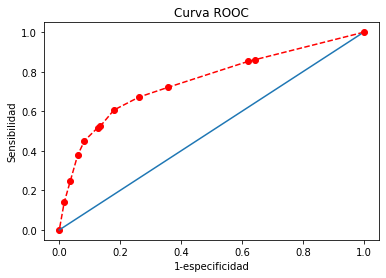

In [169]:
%matplotlib inline
plt.plot(especifities_1, sensitibities, marker="o", linestyle = "--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROOC")

In [202]:
from sklearn import metrics
from pandas import Timestamp
from ggplot import *

In [203]:
espc_1, sensit, _ =metrics.roc_curve(Y_test, prob)

In [204]:
df = pd.DataFrame({
    "x":espc_1,
    "y": sensit
})

In [205]:
df.head()

,x,y
0,0.000000,0.000000
1,0.000898,0.000000
2,0.000898,0.008197
3,0.001795,0.008197
4,0.003591,0.008197


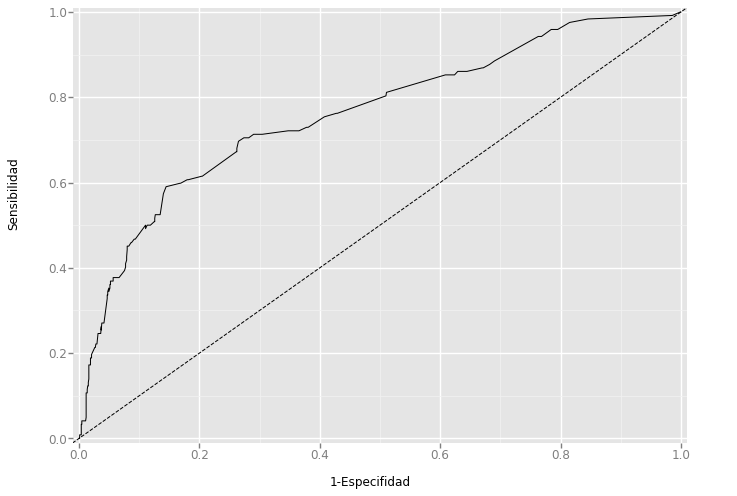

<ggplot: (-9223371915330607204)>

In [208]:
ggplot(df, aes(x="x", y="y")) +geom_line() + geom_abline(linetype="dashed")+xlim(-0.01,1.01)+ylim(-0.01,1.01)+xlab("1-Especifidad")+ylab("Sensibilidad")

In [210]:
auc = metrics.auc(espc_1,sensit)
auc

0.7620964181652293

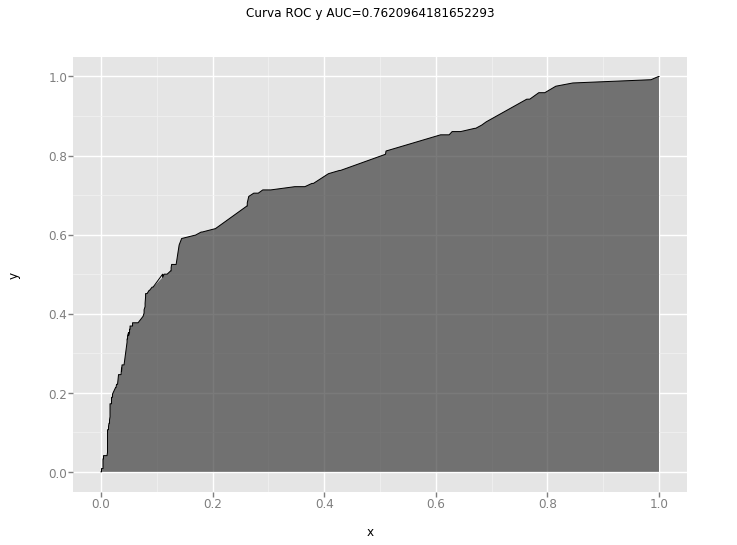

<ggplot: (-9223371915329560840)>

In [219]:
ggplot(df, aes(x="x", y="y")) + geom_area(alpha=0.65)+geom_line(aes(y="y"))+ggtitle("Curva ROC y AUC=%s"%str(auc))